<a href="https://colab.research.google.com/github/vellapu09/Machine-learning/blob/Boston-Housing-Price-Prediction-Project/Regression_analysis_using_Boston_Housing_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
path_to_csv_file = "/content/drive/MyDrive/projects/HousingData.csv"

# Load the dataset from CSV
boston_df = pd.read_csv(path_to_csv_file)

# Display the first few rows of the dataframe to ensure it's loaded correctly
print(boston_df.head())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222     18.7   

        B  LSTAT  MEDV  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90    NaN  36.2  


In [ ]:
# Check for duplicates
duplicate_rows = boston_df.duplicated()
if duplicate_rows.any():
    print("Duplicate rows found.")
else:
    print("No duplicate rows found.")


No duplicate rows found.


In [ ]:
# Check for missing values and null values
missing_values = boston_df.isnull().sum()
if missing_values.any():
    print("Missing values found. Treating missing values...")
    # Fill missing values with mean value of the respective column
    boston_df.fillna(boston_df.mean(), inplace=True)
    print("Missing values treated.")
else:
    print("No missing values found.")

Missing values found. Treating missing values...
Missing values treated.


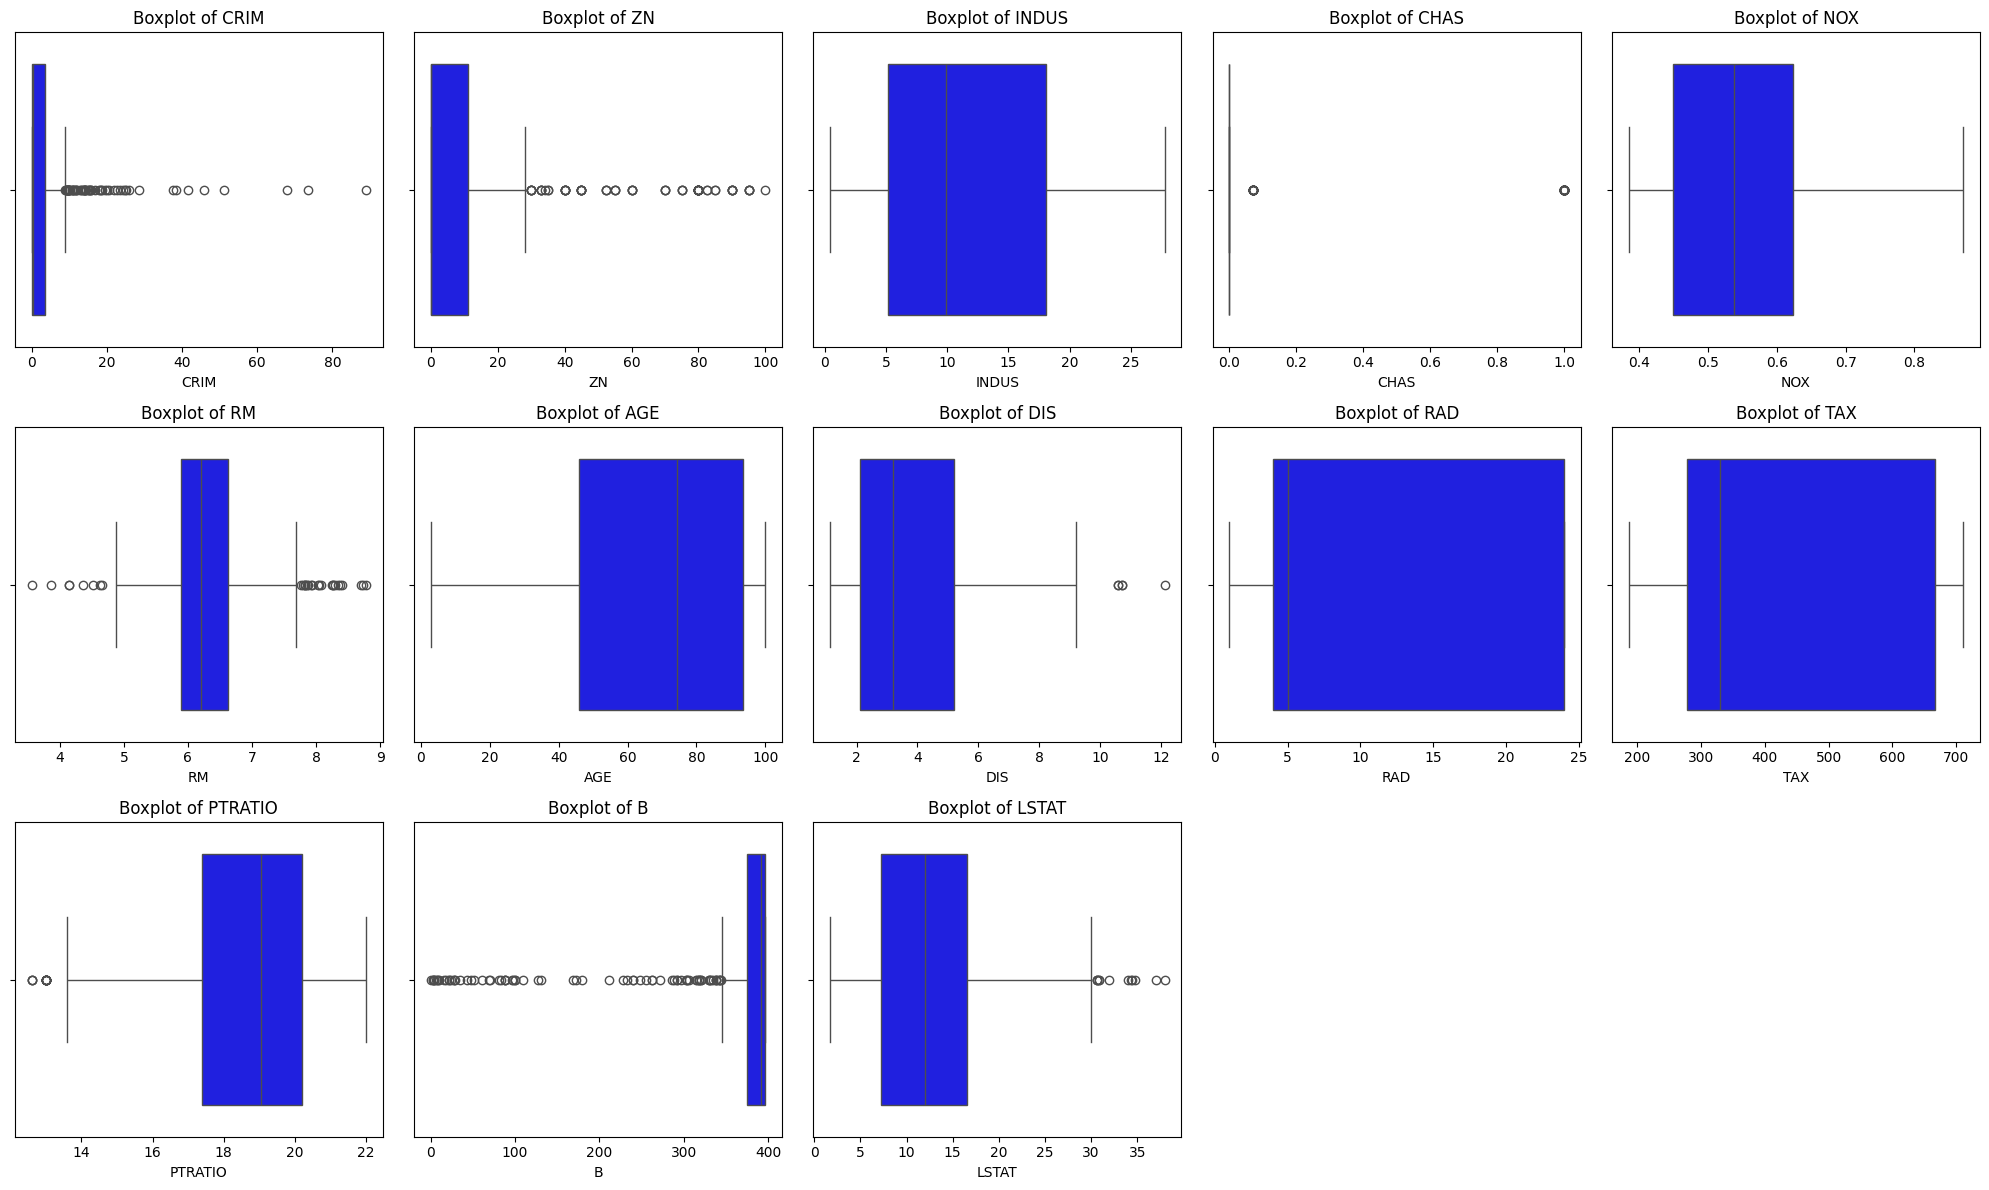

In [ ]:
# Box plot of key features
features = boston_df.columns[:-1]
plt.figure(figsize=(20, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 5, i+1)
    sns.boxplot(x=boston_df[feature], color='blue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


In [ ]:
# Handling outliers using IQR method
Q1 = boston_df.quantile(0.25)
Q3 = boston_df.quantile(0.75)
IQR = Q3 - Q1
outliers = (boston_df < (Q1 - 1.5 * IQR)) | (boston_df > (Q3 + 1.5 * IQR))
boston_df = boston_df[~outliers.any(axis=1)]


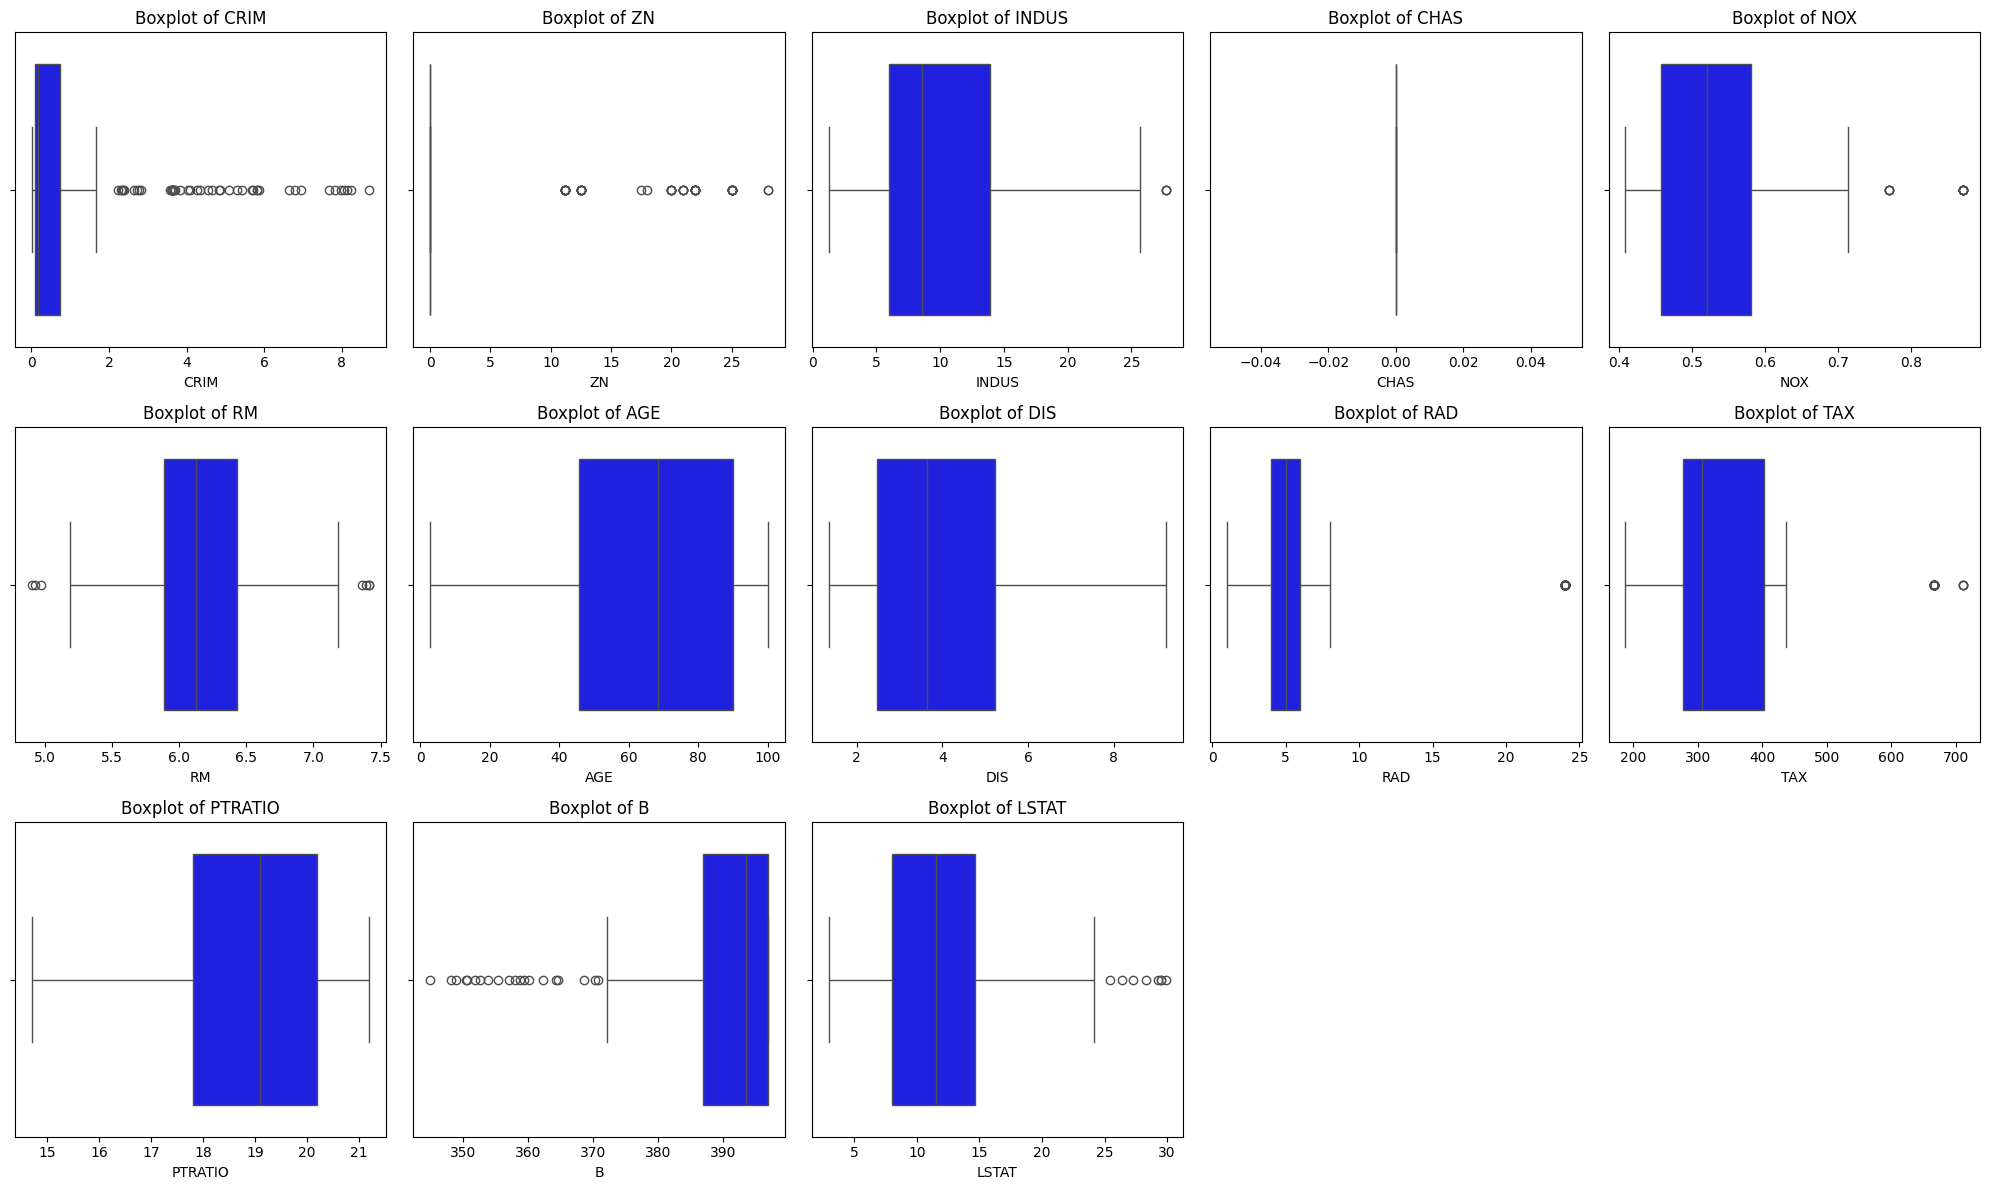

In [ ]:
# Box plot of key features
features = boston_df.columns[:-1]
plt.figure(figsize=(20, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 5, i+1)
    sns.boxplot(x=boston_df[feature], color='blue')
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
plt.tight_layout()
plt.show()


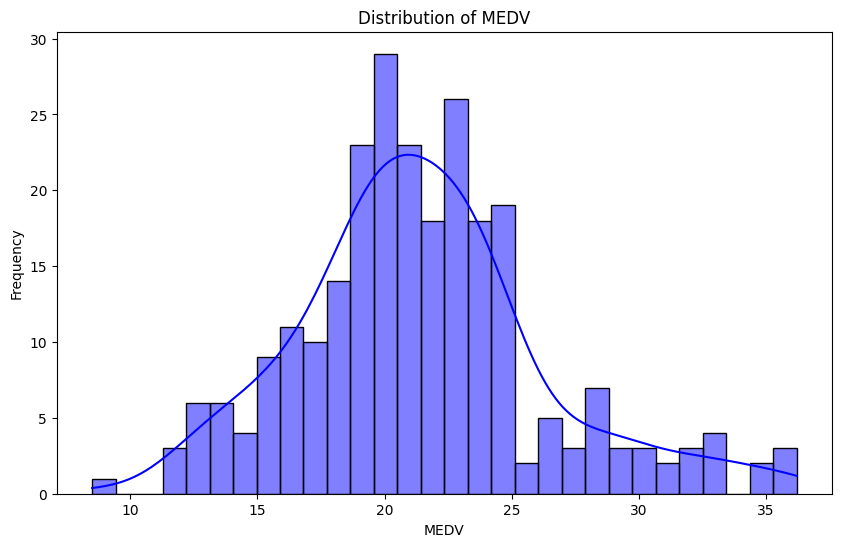

In [ ]:
# Visualize the distribution of target variable (MEDV)
plt.figure(figsize=(10, 6))
sns.histplot(boston_df['MEDV'], kde=True, bins=30, color='blue')
plt.title('Distribution of MEDV')
plt.xlabel('MEDV')
plt.ylabel('Frequency')
plt.show()

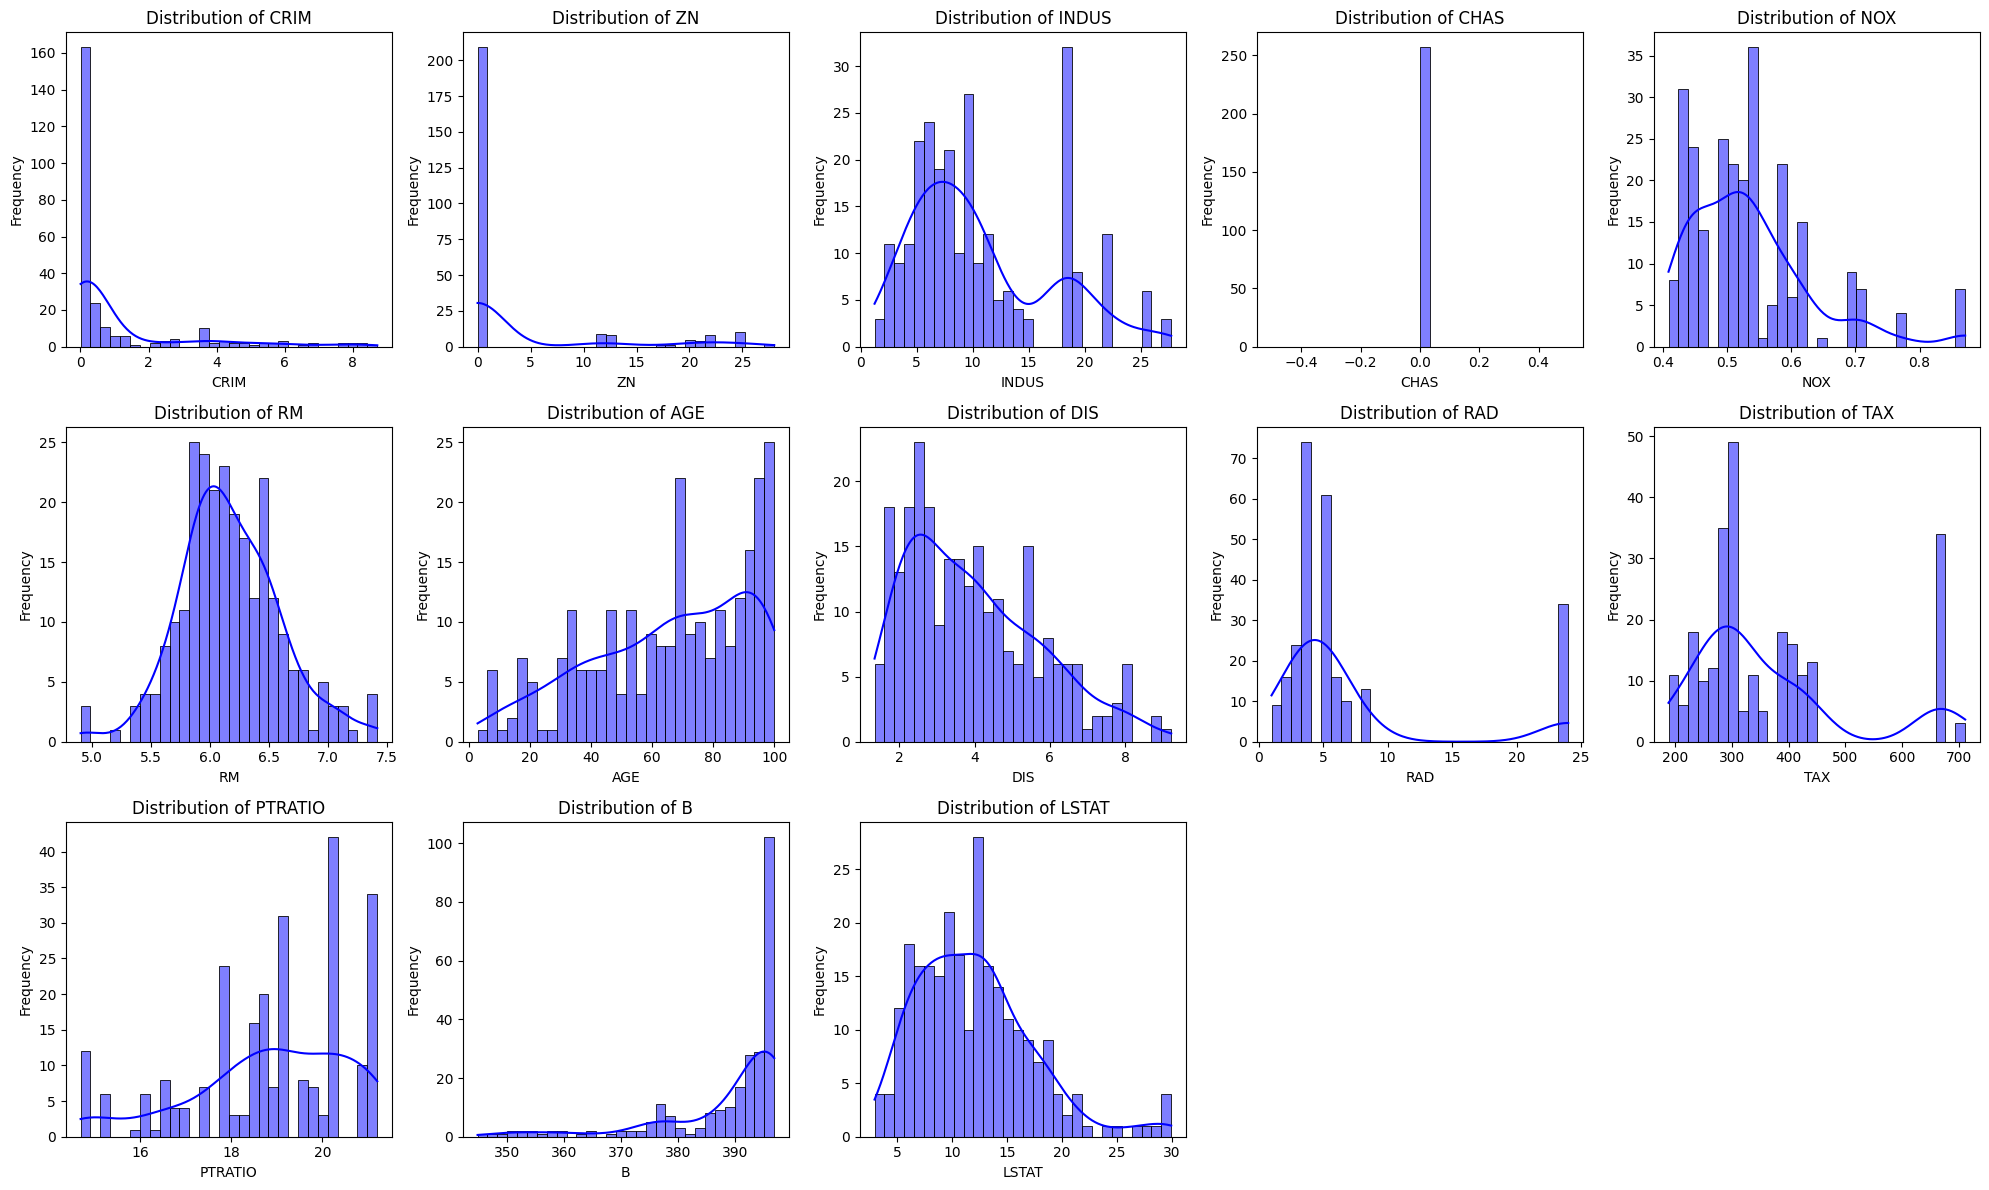

In [ ]:
# Visualize key features
features = boston_df.columns[:-1]
plt.figure(figsize=(20, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 5, i+1)
    sns.histplot(boston_df[feature], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


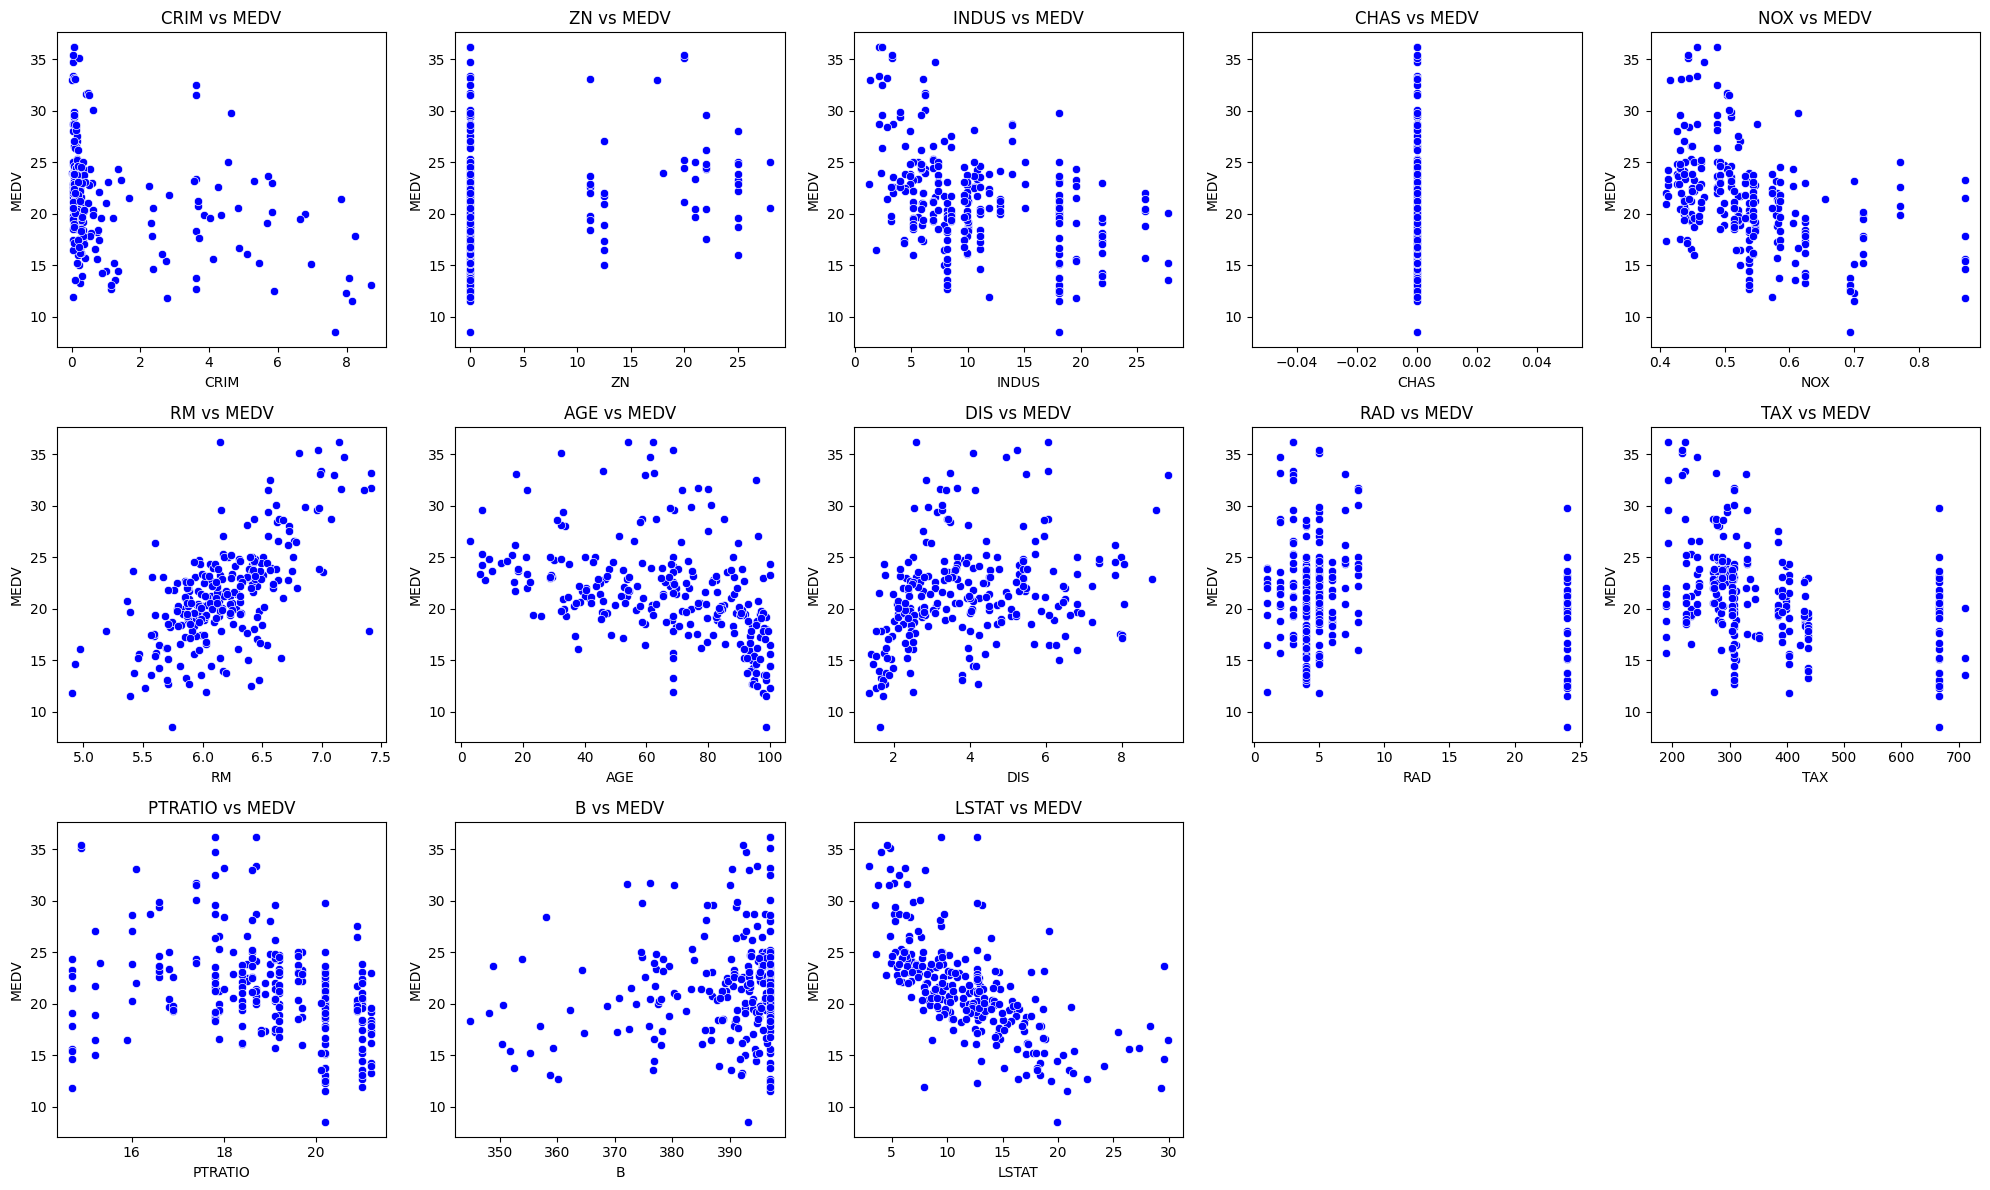

In [ ]:
# Scatter plots of key features against target variable (MEDV)
plt.figure(figsize=(20, 12))
for i, feature in enumerate(features):
    plt.subplot(3, 5, i+1)
    sns.scatterplot(x=boston_df[feature], y=boston_df['MEDV'], color='blue')
    plt.title(f'{feature} vs MEDV')
    plt.xlabel(feature)
    plt.ylabel('MEDV')
plt.tight_layout()
plt.show()

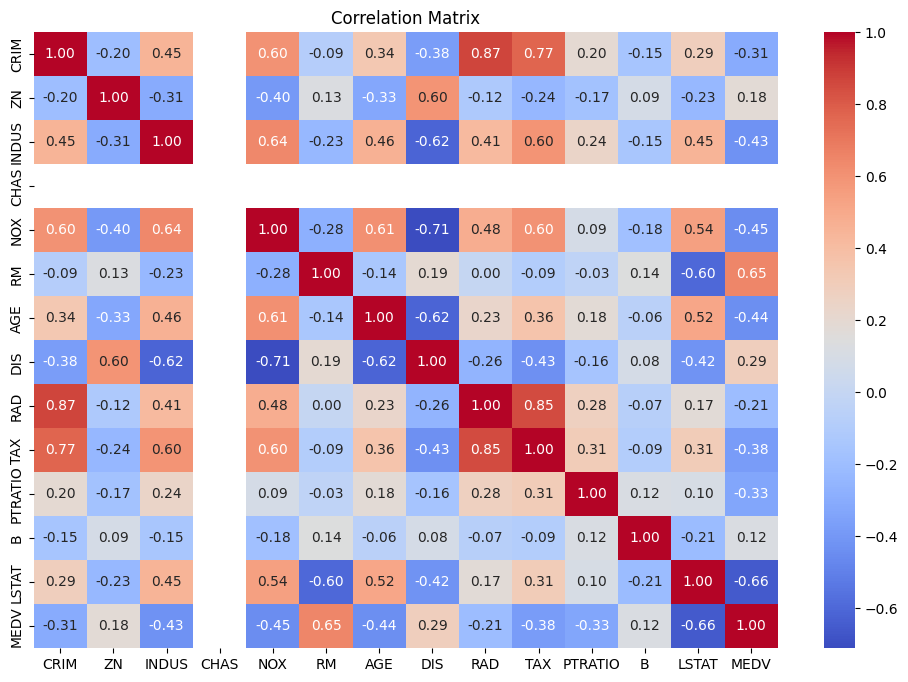

In [ ]:
# Check for correlation between features and target variable
correlation_matrix = boston_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

# Preparing the data (scaled or unscaled as needed)
X = boston_df.drop(columns=['MEDV'])  # Features
y = boston_df['MEDV']  # Target variable


In [ ]:
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Adding a constant for OLS model
X_train_ols = sm.add_constant(X_train)
X_test_ols = sm.add_constant(X_test)


In [ ]:
# Model Implementation
linear_reg = LinearRegression()
ridge_reg = Ridge(alpha=1.0)
lasso_reg = Lasso(alpha=1.0)
ols_reg = sm.OLS(y_train, X_train_ols)  # OLS regression


In [ ]:
# Fitting the models
linear_reg.fit(X_train, y_train)
ridge_reg.fit(X_train, y_train)
lasso_reg.fit(X_train, y_train)
ols_result = ols_reg.fit()  # Fitting OLS model


In [ ]:
# Predictions
linear_pred = linear_reg.predict(X_test)
ridge_pred = ridge_reg.predict(X_test)
lasso_pred = lasso_reg.predict(X_test)
ols_pred = ols_result.predict(X_test_ols)  # Predicting using OLS model


In [ ]:
# Evaluating models
evaluate_model(y_test, linear_pred, "Linear Regression")
evaluate_model(y_test, ridge_pred, "Ridge Regression")
evaluate_model(y_test, lasso_pred, "Lasso Regression")
evaluate_model(y_test, ols_pred, "OLS Regression")  # Evaluating OLS model

Linear Regression Model:
R^2 Score: 0.633
Mean Squared Error: 7.81

Ridge Regression Model:
R^2 Score: 0.635
Mean Squared Error: 7.77

Lasso Regression Model:
R^2 Score: 0.441
Mean Squared Error: 11.90

OLS Regression Model:
R^2 Score: 0.633
Mean Squared Error: 7.81



In [ ]:
# Scaling the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Adding a constant for OLS regression on scaled data
X_train_scaled_ols = sm.add_constant(X_train_scaled)
X_test_scaled_ols = sm.add_constant(X_test_scaled)

# OLS Regression requires a different approach
ols_reg = sm.OLS(y_train, X_train_scaled_ols)

In [ ]:
# Fitting the models
linear_reg.fit(X_train_scaled, y_train)
ridge_reg.fit(X_train_scaled, y_train)
lasso_reg.fit(X_train_scaled, y_train)
ols_results = ols_reg.fit()  # Fitting the OLS model

In [ ]:
# Making predictions
linear_pred = linear_reg.predict(X_test_scaled)
ridge_pred = ridge_reg.predict(X_test_scaled)
lasso_pred = lasso_reg.predict(X_test_scaled)
ols_pred = ols_results.predict(X_test_scaled_ols)  # Predicting with OLS

In [ ]:
# Model Evaluation
def evaluate_model(true, pred, model_name):
    r2 = r2_score(true, pred)
    mse = mean_squared_error(true, pred)
    print(f"{model_name} Model:")
    print(f"R^2 Score: {r2:.3f}")
    print(f"Mean Squared Error: {mse:.2f}\n")
